In [272]:
import numpy as np 
import pandas as pd
pd.set_option('display.max_colwidth', -1)
import matplotlib.pyplot as plt
%matplotlib inline
import re


In [273]:
df = pd.read_csv('MWG_dataset.csv')


In [274]:
df.drop(['Unnamed: 0'], axis = 1)

,bubble_rating,review_date,review_paragraph,review_title,site
0,5,11 March 2020,"This place is swarming with Gadventurers and CEOs and the food is quite good, especially their garlic naan, my favorite. Almost all their dishes are exceptionally good. Came here three times and tried different dishes on the menu....never disappointed.",Great Indian Food For a Cause,TripAdvisor
1,5,11 March 2020,Visited about a week ago and we were very impressed with the food service and gereral ambience of this very clean and slick restaurant. It is well worth a visit if in the area and prices are good. We will be returning soon.,Dinner,TripAdvisor
2,5,2 March 2020,I enjoyed a fantastic meal at KWAC thanks to Brikash Sharma our excellent guide while spending sometime in New Delhi recently. We were a table of 15+ South Africans so appreciated the giving back ethos of supporting the under privileged and street people. My meal was delicious and well priced. I highly recommend to all “westerners” wanting to support local smaller restaurants. Namaste,Kitchen with a Cause - FANTASTIC,TripAdvisor
3,5,25 February 2020,"This is a lovely hidden gem in Karol Bagh, walking distance from the metro. The restaurant is beautiful with great food at reasonable prices. The staff is friendly & competent also goes the extra mile if you want to celebrate a birthday or get together. They baked the most delicious chocolate cake and made my friends birthday extra special. So happy our tour guide Miksa took us there. I can highly recommend this restaurant to all my traveling buddies & friends visiting Delhi from South Africa.",Intrepid Tour experience,TripAdvisor
4,5,23 February 2020,"The restaurant is a social project, so 5 stars just for it. Talking about the restaurant:- Food: wide variety of Indian dishes- Service: super kind and fast- Quality: very good (although some dishes are interpreted in the wrong way, the springs rolls and the fried rice. They were good and tasty, but do not expect the ""traditional"" dish).- Place: super clean - Price: super fair!Therefore, I would surely come back. :)",Great restaurant!,TripAdvisor
...,...,...,...,...,...
206,5,19 February 2018,"A perfect meal and a great place and atmosphere - attentive staff and had a great vibe, we wouldn’t visit Delhi again without coming here first!",Perfect Visit in heart of Dehli,TripAdvisor
207,5,19 February 2018,"This was our tour groups first meal in India, and we were made to feel instantly welcome. The manager came to introduce himself and the food was incredible. Apart from being the best presented food we had during our trip, it tasted lovely too. I stuck with vegetarian, but the meat received good comments from our group too. A definite recommendation.",Excellent food and vibe,TripAdvisor
208,5,17 February 2018,"Lip smacking, delicious food, cool ambience, homely vibe with a really helpful and friendly staff.Also great initiative - giving back to the community!!!",Delicious food,TripAdvisor
209,5,16 February 2018,Great ambiance and super service with their food quality. They did every thing to make my son birthday special.,Best Birthday party ever,TripAdvisor


# Rating Analysis:

In [275]:
df['bubble_rating'].agg(['max','min','mean'])

max     5.000000
min     1.000000
mean    4.767773
Name: bubble_rating, dtype: float64

**Note** : Average Rating of the restaurant : 4.7677

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001736FBE9C08>]],
      dtype=object)

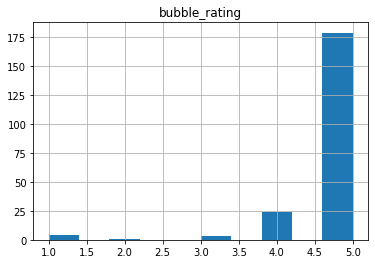

In [276]:
df.hist(column = "bubble_rating", bins = 10)

As expected most of the reviews rated the restaurant 5. Hence the mean rating is close to 5.

# Review Analysis

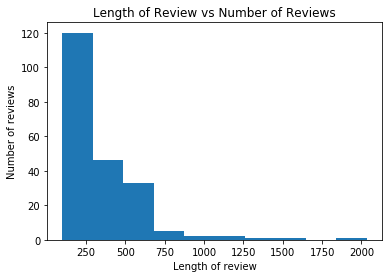

In [382]:
plt.hist(df['review_paragraph'].map(lambda x: len(x)))
plt.xlabel('Length of review')
plt.ylabel('Number of reviews')
plt.title('Length of Review vs Number of Reviews')
plt.show()

In [384]:
df['review_paragraph'].map(lambda x: len(x)).mean()

335.74407582938386

Most of the reviews have length of around 250 characters. And mean length of review is 355 characters.

# Natural Language Processing

In [279]:
import nltk
from nltk import stem
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords

stemmer = stem.SnowballStemmer('english')
stopwords = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mepiy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mepiy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [280]:
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
    

In [281]:
corpus = []
def clean_review():
    for i in range(0,len(df['review_paragraph'])):
        review = re.sub('[^a-zA-Z]', ' ', df['review_paragraph'][i])  

        # convert all cases to lower cases 
        review = review.lower()  

        # split to array(default delimiter is " ") 
        review = review.split()  

        # creating PorterStemmer object to 
        # take main stem of each word 
        
        # loop for stemming each word 
        # in string array at ith row     
        review = [w for w in review if not w in stopwords]
        porter = PorterStemmer()
        review = [porter.stem(word) for word in review]
        # rejoin all string array elements 
        # to create back into a string 
        review = ' '.join(review)   

        # append each string to create 
        # array of clean text  
        corpus.append(review) 

In [282]:
clean_review()

In [283]:
corpus

['place swarm gadventur ceo food quit good especi garlic naan favorit almost dish except good came three time tri differ dish menu never disappoint',
 'visit week ago impress food servic gerer ambienc clean slick restaur well worth visit area price good return soon',
 'enjoy fantast meal kwac thank brikash sharma excel guid spend sometim new delhi recent tabl south african appreci give back etho support privileg street peopl meal delici well price highli recommend western want support local smaller restaur namast',
 'love hidden gem karol bagh walk distanc metro restaur beauti great food reason price staff friendli compet also goe extra mile want celebr birthday get togeth bake delici chocol cake made friend birthday extra special happi tour guid miksa took us highli recommend restaur travel buddi friend visit delhi south africa',
 'restaur social project star talk restaur food wide varieti indian dish servic super kind fast qualiti good although dish interpret wrong way spring roll fr

In [284]:
new_df = df

In [285]:
new_df['cleaned'] = corpus

In [286]:
new_df

,Unnamed: 0,bubble_rating,review_date,review_paragraph,review_title,site,cleaned
0,0,5,11 March 2020,"This place is swarming with Gadventurers and CEOs and the food is quite good, especially their garlic naan, my favorite. Almost all their dishes are exceptionally good. Came here three times and tried different dishes on the menu....never disappointed.",Great Indian Food For a Cause,TripAdvisor,place swarm gadventur ceo food quit good especi garlic naan favorit almost dish except good came three time tri differ dish menu never disappoint
1,1,5,11 March 2020,Visited about a week ago and we were very impressed with the food service and gereral ambience of this very clean and slick restaurant. It is well worth a visit if in the area and prices are good. We will be returning soon.,Dinner,TripAdvisor,visit week ago impress food servic gerer ambienc clean slick restaur well worth visit area price good return soon
2,2,5,2 March 2020,I enjoyed a fantastic meal at KWAC thanks to Brikash Sharma our excellent guide while spending sometime in New Delhi recently. We were a table of 15+ South Africans so appreciated the giving back ethos of supporting the under privileged and street people. My meal was delicious and well priced. I highly recommend to all “westerners” wanting to support local smaller restaurants. Namaste,Kitchen with a Cause - FANTASTIC,TripAdvisor,enjoy fantast meal kwac thank brikash sharma excel guid spend sometim new delhi recent tabl south african appreci give back etho support privileg street peopl meal delici well price highli recommend western want support local smaller restaur namast
3,3,5,25 February 2020,"This is a lovely hidden gem in Karol Bagh, walking distance from the metro. The restaurant is beautiful with great food at reasonable prices. The staff is friendly & competent also goes the extra mile if you want to celebrate a birthday or get together. They baked the most delicious chocolate cake and made my friends birthday extra special. So happy our tour guide Miksa took us there. I can highly recommend this restaurant to all my traveling buddies & friends visiting Delhi from South Africa.",Intrepid Tour experience,TripAdvisor,love hidden gem karol bagh walk distanc metro restaur beauti great food reason price staff friendli compet also goe extra mile want celebr birthday get togeth bake delici chocol cake made friend birthday extra special happi tour guid miksa took us highli recommend restaur travel buddi friend visit delhi south africa
4,4,5,23 February 2020,"The restaurant is a social project, so 5 stars just for it. Talking about the restaurant:- Food: wide variety of Indian dishes- Service: super kind and fast- Quality: very good (although some dishes are interpreted in the wrong way, the springs rolls and the fried rice. They were good and tasty, but do not expect the ""traditional"" dish).- Place: super clean - Price: super fair!Therefore, I would surely come back. :)",Great restaurant!,TripAdvisor,restaur social project star talk restaur food wide varieti indian dish servic super kind fast qualiti good although dish interpret wrong way spring roll fri rice good tasti expect tradit dish place super clean price super fair therefor would sure come back
...,...,...,...,...,...,...,...
206,6,5,19 February 2018,"A perfect meal and a great place and atmosphere - attentive staff and had a great vibe, we wouldn’t visit Delhi again without coming here first!",Perfect Visit in heart of Dehli,TripAdvisor,perfect meal great place atmospher attent staff great vibe visit delhi without come first
207,7,5,19 February 2018,"This was our tour groups first meal in India, and we were made to feel instantly welcome. The manager came to introduce himself and the food was incredible. Apart from being the best presented food we had during our trip, it tasted lovely too. I stuck with vegetarian, but the meat received good comments from our group too. A definite recommendation.",Excellent food and vibe,TripAdvisor,tour group f

In [287]:
vec = CountVectorizer().fit(corpus)
bag_of_words = vec.transform(corpus)
sum_words = bag_of_words.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)

**Top 10 most frequent words:**

In [348]:
words_freq[:10]

[('food', 240),
 ('restaur', 136),
 ('great', 124),
 ('good', 109),
 ('place', 99),
 ('servic', 83),
 ('caus', 80),
 ('staff', 79),
 ('visit', 77),
 ('delhi', 71)]

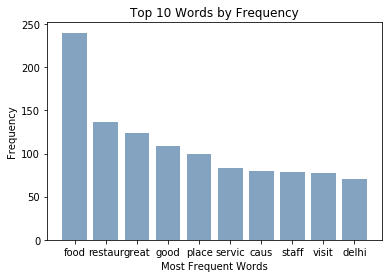

In [388]:
plt.bar([words_freq[i][0] for i in range(10)],[words_freq[i][1] for i in range(10)],color =[0.2, 0.4, 0.6, 0.6])
plt.xlabel('Most Frequent Words')
plt.ylabel('Frequency')
plt.title("Top 10 Words by Frequency")
plt.show()

<h4> Word Cloud for most frequent words in the reviews </h4>

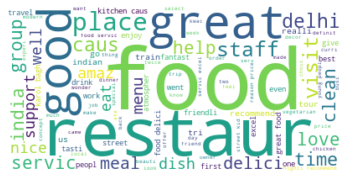

In [354]:
from wordcloud import WordCloud 
wordcloud = WordCloud(max_font_size=100, max_words=100,background_color="white").generate(" ".join(corpus))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Sentiment Analysis

In [290]:
# !pip install vaderSentiment

In [291]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [330]:
new_df['Score'] = 'N/a'
new_df['Polarity'] = 'N/a'

new_df['Positive Score'] = 'N/a'

def sentiment_analyzer_scores():
    for i in range(0,len(df['review_paragraph'])):
        score = analyser.polarity_scores(df['review_paragraph'][i])
        new_df['Score'][i] = score
        new_df['Positive Score'][i] = float(score['pos'])
        
        if score['pos'] >= 0.05 : 
            new_df['Polarity'][i] = "Positive" 
        elif score['neg'] >= 0.05 : 
            new_df['Polarity'][i] = "Negative"
        elif score['neu'] >= 0.05: 
            new_df['Polarity'][i] = "Neutral"

In [331]:
sentiment_analyzer_scores()

C:\Users\mepiy\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\mepiy\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\mepiy\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_

In [332]:
new_df

,Unnamed: 0,bubble_rating,review_date,review_paragraph,review_title,site,cleaned,Score,Polarity,Positive Score
0,0,5,11 March 2020,"This place is swarming with Gadventurers and CEOs and the food is quite good, especially their garlic naan, my favorite. Almost all their dishes are exceptionally good. Came here three times and tried different dishes on the menu....never disappointed.",Great Indian Food For a Cause,TripAdvisor,place swarm gadventur ceo food quit good especi garlic naan favorit almost dish except good came three time tri differ dish menu never disappoint,"{'neg': 0.065, 'neu': 0.737, 'pos': 0.198, 'compound': 0.742}",Positive,0.198
1,1,5,11 March 2020,Visited about a week ago and we were very impressed with the food service and gereral ambience of this very clean and slick restaurant. It is well worth a visit if in the area and prices are good. We will be returning soon.,Dinner,TripAdvisor,visit week ago impress food servic gerer ambienc clean slick restaur well worth visit area price good return soon,"{'neg': 0.0, 'neu': 0.741, 'pos': 0.259, 'compound': 0.9059}",Positive,0.259
2,2,5,2 March 2020,I enjoyed a fantastic meal at KWAC thanks to Brikash Sharma our excellent guide while spending sometime in New Delhi recently. We were a table of 15+ South Africans so appreciated the giving back ethos of supporting the under privileged and street people. My meal was delicious and well priced. I highly recommend to all “westerners” wanting to support local smaller restaurants. Namaste,Kitchen with a Cause - FANTASTIC,TripAdvisor,enjoy fantast meal kwac thank brikash sharma excel guid spend sometim new delhi recent tabl south african appreci give back etho support privileg street peopl meal delici well price highli recommend western want support local smaller restaur namast,"{'neg': 0.0, 'neu': 0.576, 'pos': 0.424, 'compound': 0.9887}",Positive,0.424
3,3,5,25 February 2020,"This is a lovely hidden gem in Karol Bagh, walking distance from the metro. The restaurant is beautiful with great food at reasonable prices. The staff is friendly & competent also goes the extra mile if you want to celebrate a birthday or get together. They baked the most delicious chocolate cake and made my friends birthday extra special. So happy our tour guide Miksa took us there. I can highly recommend this restaurant to all my traveling buddies & friends visiting Delhi from South Africa.",Intrepid Tour experience,TripAdvisor,love hidden gem karol bagh walk distanc metro restaur beauti great food reason price staff friendli compet also goe extra mile want celebr birthday get togeth bake delici chocol cake made friend birthday extra special happi tour guid miksa took us highli recommend restaur travel buddi friend visit delhi south africa,"{'neg': 0.0, 'neu': 0.631, 'pos': 0.369, 'compound': 0.9916}",Positive,0.369
4,4,5,23 February 2020,"The restaurant is a social project, so 5 stars just for it. Talking about the restaurant:- Food: wide variety of Indian dishes- Service: super kind and fast- Quality: very good (although some dishes are interpreted in the wrong way, the springs rolls and the fried rice. They were good and tasty, but do not expect the ""traditional"" dish).- Place: super clean - Price: super fair!Therefore, I would surely come back. :)",Great restaurant!,TripAdvisor,restaur social project star talk restaur food wide varieti indian dish servic super kind fast qualiti good although dish interpret wrong way spring roll fri rice good tasti expect tradit dish place super clean price super fair therefor would sure come back,"{'neg': 0.022, 'neu': 0.648, 'pos': 0.33, 'compound': 0.9835}",Positive,0.33
...,...,...,...,...,...,...,...,...,...,...
206,6,5,19 February 2018,"A perfect meal and a great place and atmosphere - attentive staff and had a great vibe, we wouldn’t visit Delhi again without coming here first!",Perfect Visit in heart of Dehli,TripAdvisor,perfect meal great place atmospher attent staff great vibe visit delhi without come 

**Most Positive Review** 

In [333]:
new_df[new_df['Positive Score'] == new_df['Positive Score'].max()]['review_paragraph']

107    Amazing food, amazing staff, amazing cause. Lovely to eat at a place that is helping the kids. Food was great. Highly recommend 
Name: review_paragraph, dtype: object

**Most Negative Review**

In [371]:
new_df[new_df['Positive Score'] == new_df['Positive Score'].min()]['review_paragraph']

94    Had to Order 3 times to get something that they had ingredients for, disappointing service, in the end I got a pizza, the smallest pizza I’ve ever seen
Name: review_paragraph, dtype: object

</br>

**Number of Negative Reviews**

In [344]:
new_df[new_df['Polarity'] == 'Negative']

,Unnamed: 0,bubble_rating,review_date,review_paragraph,review_title,site,cleaned,Score,Polarity,Positive Score
94,4,1,11 April 2019,"Had to Order 3 times to get something that they had ingredients for, disappointing service, in the end I got a pizza, the smallest pizza I’ve ever seen",No ingredients,TripAdvisor,order time get someth ingredi disappoint servic end got pizza smallest pizza ever seen,"{'neg': 0.106, 'neu': 0.894, 'pos': 0.0, 'compound': -0.4939}",Negative,0


In [345]:
new_df[new_df['Polarity'] == 'Negative'].count()[0]

1

<br>

**Neutral Review & number of Neutral Reviews**

In [342]:
new_df[new_df['Polarity'] == 'Neutral']

,Unnamed: 0,bubble_rating,review_date,review_paragraph,review_title,site,cleaned,Score,Polarity,Positive Score
54,4,4,14 October 2019,"""As it is in its name that this place is run for a Cause ie to help underprivileged to earn their living""...Good Ambience, Food & staff. When we visited this place it was fully occupied by the Foreign tourists & some were also waiting for their table..they have a bar & the prices are also moderate...","""Casual outing""",TripAdvisor,name place run caus ie help underprivileg earn live good ambienc food staff visit place fulli occupi foreign tourist also wait tabl bar price also moder,"{'neg': 0.0, 'neu': 0.953, 'pos': 0.047, 'compound': 0.4019}",Neutral,0.047


In [343]:
new_df[new_df['Polarity'] == 'Neutral'].count()[0]

1

</br>

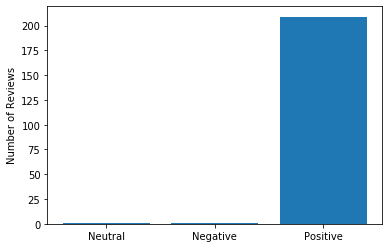

In [398]:
sizes = [new_df[new_df['Polarity'] == 'Neutral'].count()[0],new_df[new_df['Polarity'] == 'Negative'].count()[0],new_df[new_df['Polarity'] == 'Positive'].count()[0]]
labels = ['Neutral','Negative','Positive']
plt.bar(labels,sizes)
plt.ylabel('Number of Reviews')
plt.show()

Most of the reviews are Positive